# 2DI70 Statistical Learning Theory 
## Assignment 1

### Group x
Name1 ID1

Name2 ID2

Name3 ID3

In [21]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import numpy as np
import operator


#### Load MNIST data from csv files

In [22]:
train_small = pd.read_csv("MNIST_train_small.csv").values
test_small  = pd.read_csv("MNIST_test_small.csv").values

In [23]:
## Normalizing the data is probably not necessary for this specific dataset
X_train_s = train_small[:, 1:]/255.0
y_train_s = train_small[:,0]

X_test_s = test_small[:, 1:]/255.0
y_test_s = test_small[:,0]

#### Define functions

In [24]:
## Render chosen data point as image
def show_img(data, index):
    plt.imshow(data[index].reshape(28,28), cmap = "Greys")
    plt.show()

In [25]:
## Compute the nth root of given value
def n_root(val, p):   
    return val**(1 / float(p))
  
## Compute Minkowski distance for two given vectors
## Use p = 2 for Euclidian distance
def minkowski_dist(x1, x2, p):    
    p_sum = sum(pow(abs(a-b), p) for a, b in zip(x1, x2))
    return n_root(p_sum, p) 
  
v1 = X_train_s[0]
v2 = X_train_s[1]
print(minkowski_dist(v1, v2, 2)) 

8.617445178210408


In [26]:
## Compute p-minkowski distance from point to every datapoint in collection
## The list of labels should share length and indices with collection
def compute_dists(point, collection, labels, p):
    vals = []
    for i in range(len(collection)):
        d = minkowski_dist(point, collection[i], p)
        vals.append([i, d, labels[i]])
    
    return vals

#### Do KNN magic

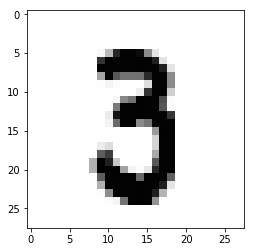

In [27]:
## Compute knn for example data
show_img(X_train_s, 0)
dists1 = compute_dists(X_train_s[0], X_train_s, y_train_s, 2)

In [28]:
## Since the point we selected is in the training set, it shows up in the list with a distance of 0
## In this case, we can confidently say it is a 3
dists1_sorted = sorted(dists1, key = lambda x: float(x[1]))
dists1_sorted[0:10]

[[0, 0.0, 3],
 [738, 5.260808796066775, 3],
 [163, 5.314273902674663, 3],
 [1273, 5.70711529028132, 3],
 [610, 5.733737010010271, 3],
 [1120, 5.750525442785872, 3],
 [2373, 5.8194902477416495, 3],
 [1504, 5.839323666682236, 3],
 [1790, 5.952746128195252, 3],
 [1597, 5.990987720867725, 3]]

In [60]:
#Predefine top k value, length range r of test data to select
k = 20
r = len(X_test_s)
error = 0
percent_error = error/r
#for each x in test set, compute the distance with all x in training set, then sort in distance for top 20 nearest neighbors
for i in range(r):
    dists = compute_dists(X_test_s[i], X_train_s, y_train_s, 2)
    dists_sorted = sorted(dists, key = lambda x: float(x[1]))
    list = dists_sorted[0:k] #get list top 20 nearest neighbors with its [index,distance,label] 
     
#count frequency of labels of the top 20 nearest neighbors
    pred_class = {}
    for j in range(k):
        labels = list[j][-1]
        if labels in pred_class:
            pred_class[labels] += 1
        else:
            pred_class[labels] = 1
        #sort the most frequency labels at the beginning, return the prediction as the most frequency label at first position
    sortedVotes = sorted(pred_class.items(), key=operator.itemgetter(1), reverse=True) 
    if sortedVotes[0][0] != y_test_s[i]:
        error = error + 1
        #percent_error += percent_error 
    print(sortedVotes[0][0],y_test_s[i],error)
print("total percentage of error" + str(error/r))


2 2 0
1 1 0
3 3 0
9 9 0
1 1 0
4 4 0
2 2 0
6 6 0
3 3 0
7 7 0
4 4 0
9 9 0
0 0 0
6 6 0
7 7 0
6 6 0
7 7 0
9 9 0
9 9 0
0 2 1
1 1 1
3 3 1
7 7 1
0 0 1
1 1 1
1 7 2
1 1 2
5 5 2
2 2 2
1 8 3
2 2 3
1 4 4
0 0 4
2 2 4
8 8 4
1 7 5
1 8 6
6 6 6
1 1 6
3 3 6
5 5 6
4 4 6
7 7 6
9 7 7
8 8 7
9 9 7
1 1 7
5 5 7
1 1 7
6 6 7
1 1 7
6 6 7
1 1 7
2 2 7
7 7 7
1 1 7
9 9 7
4 4 7
0 0 7
6 6 7
8 8 7
9 9 7
0 0 7
3 3 7
7 7 7
1 1 7
8 8 7
4 4 7
3 3 7
2 2 7
1 1 7
0 0 7
6 6 7
7 7 7
3 3 7
9 9 7
9 4 8
4 8 9
8 8 9
9 9 9
9 5 10
4 4 10
1 1 10
7 7 10
4 4 10
7 7 10
1 1 10
3 3 10
0 0 10
6 6 10
9 9 10
4 4 10
0 0 10
3 3 10
5 5 10
8 8 10
4 4 10
0 0 10
1 1 10
3 3 10
9 7 11
0 6 12
5 5 12
1 1 12
7 7 12
4 4 12
9 9 12
6 6 12
4 4 12
6 6 12
9 9 12
3 3 12
5 8 13
6 5 14
3 3 14
5 5 14
2 2 14
8 8 14
6 6 14
1 8 15
3 3 15
4 4 15
5 5 15
9 9 15
9 9 15
8 3 16
6 6 16
8 8 16
8 8 16
2 2 16
7 7 16
3 3 16
3 3 16
9 9 16
5 5 16
1 2 17
8 8 17
9 5 18
9 9 18
8 8 18
4 4 18
4 4 18
8 8 18
4 9 19
4 9 20
7 7 20
8 8 20
7 7 20
1 1 20
8 8 20
9 9 20
0 0 20
6 6 20
8 8 20
0 